# Assignment 2: 
Develop a program using tensorflow and keras libraries to implement CNN
based architecture which will detect the objects in the test images and provide
its class and bounding box location as an output.

### Objective:
- Load a Pre-trained Model (e.g., SSD MobileNet from TensorFlow Hub)
- Load an example image
- Perform Object Detection
- Draw Bounding Boxes on Image

### Import necessary libraries
In this section, we import the necessary libraries for our object detection task. We will use TensorFlow, Keras, NumPy, Matplotlib, OpenCV, and OS libraries. These libraries will help us load the pre-trained model, process images, and visualize the detection results.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

### Load Pre-trained Model
In this section, we load the pre-trained SSD MobileNet model from TensorFlow Hub. 
This model will be used to detect objects in the images. We use the `hub.load()` method to load the model from the specified URL.

In [2]:
import tensorflow_hub as hub
MODEL_URL = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
detector = hub.load(MODEL_URL)

### Load and Preprocess Image
In this section, we define a function `load_image` to load and preprocess the image. The function reads the image using OpenCV, converts it to RGB format, resizes it to 300x300 pixels, and expands its dimensions to match the input shape expected by the model. This preprocessed image will be used for object detection.

In [3]:
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (300, 300))
    img = np.array(img, dtype=np.float32)
    img = np.expand_dims(img, axis=0)
    return img

### Perform Object Detection
In this section, we define a function `detect_objects` that takes an image path as input, loads and preprocesses the image using the `load_image` function, and performs object detection using the pre-trained SSD MobileNet model. The function returns the detection results, which include the bounding boxes and scores for the detected objects.

In [4]:
def detect_objects(image_path):
    img = load_image(image_path)
    result = detector(img)
    return result

### Draw Bounding Boxes on Image
In this section, we define a function `draw_bounding_boxes` that takes an image path, detection results, and an optional threshold as input. The function reads the image using OpenCV, converts it to RGB format, and retrieves the image dimensions. It then iterates through the detected bounding boxes and scores, drawing rectangles around objects with scores above the threshold. The bounding boxes are drawn on the image using OpenCV, and the scores are displayed as text. Finally, the image with bounding boxes is displayed using Matplotlib.

In [44]:
def draw_bounding_boxes(image_path, detection_result, threshold=0.5):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, _ = img.shape
    
    boxes = detection_result['detection_boxes'][0].numpy()
    scores = detection_result['detection_scores'][0].numpy()
    classes = detection_result['detection_classes'][0].numpy().astype(int)
    
    for i in range(len(boxes)):
        if scores[i] > threshold:
            y1, x1, y2, x2 = boxes[i]
            x1, y1, x2, y2 = int(x1 * width), int(y1 * height), int(x2 * width), int(y2 * height)
            img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), thickness=50)
            label = f'Class {classes[i]}: {scores[i]:.2f}'
            plt.text(x1, y1-50, label, color='red', fontsize=16)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()


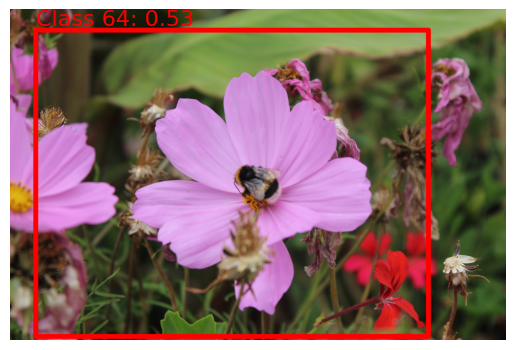

In [45]:
image_path = "image.jpg"  # Replace with your test image path
detection_result = detect_objects(image_path)
draw_bounding_boxes(image_path, detection_result)

### Conclusion
In this assignment, we successfully developed a program using TensorFlow and Keras libraries to implement a CNN-based architecture for object detection. We utilized a pre-trained SSD MobileNet model from TensorFlow Hub to detect objects in test images and provide their class and bounding box locations as output. 

We followed these steps:
1. Imported the necessary libraries.
2. Loaded the pre-trained SSD MobileNet model.
3. Loaded and preprocessed the test image.
4. Performed object detection using the pre-trained model.
5. Drew bounding boxes around detected objects and displayed the results.

This workflow demonstrates the power and flexibility of using pre-trained models for object detection tasks, allowing us to achieve accurate results with minimal effort. The use of TensorFlow Hub and OpenCV for image processing and visualization further streamlined the process, making it efficient and effective.